# Linear regression in python
This code show an implementation of the most simple *Machine Learning* algorithm : the linear regression.
While very easy, it introduces the basic concept of machine learning :
- loss 
- cost
- gradient descent
- learning Rate

## Building fake data
In order to explore, let's build fake datas.

In [35]:
n_sample = 200
n_dim = 5

## Our sample
## some points with n_dim parameters
X = np.random.random((n_sample,n_dim))

## Our algo must guess this 
theta = np.random.randint(-10,10,n_dim)

## So given this 
Y = np.dot(X,theta)
### add some noise so the problem is not too obvious
noise =  np.random.rand(n_sample) / 10
Y = Y+noise

## thus so we all get the same result
np.random.seed(42)


## Learn, step by step
Now, the *machine*, aka our code, will try to learn the Y we built above.
To do this, it won't use formulas but will try to find the hidden number, our theta, with the data it has : 
- input values (X)
- observations (Y)
To do that, it will perform some guess, compute the error and change its internal model (**th**)
This is done with a gradient descent method.

There are 2 parameter to our algo :
- expected_cost, aka, which value of error, as data scientist, we do tolerate
- learning_rate. It's the importance of how *strong* the machine must correct its errors. Two small and it's very slow, too high and it diverges.

Here, the example is quite simple but in complex issue, finding a good learning rate can be tricky.

### Good learning rate
let's start with a fine learning rate


In [21]:

##################### Now, run the regression
expected_cost = 1e-2
learning_rate = 1e-1

cost = 10000
## For graphing later
l=[]
t=0
## inital guess : random
th = np.ones(n_dim)
while cost > expected_cost and not np.isinf(cost) : 
   t+=1
   ## Make a proposition
   y_pred = np.dot(X,th)
   ## loss is how far we missed
   loss  = y_pred - Y 
   ## Cost, here, is mean squared error
   ## important note : cost is a human choosen formula
   ## it s jsut a way of evaluating the quality
   ## of our model
   ## Choosing the cost is the work of data scientist
   cost = np.sum(loss ** 2) / len(Y)
   l.append(cost)
   ## Correct the error with gradient descent
   th = th - learning_rate * np.dot(X.T,loss) / len(Y)







 our algo found :
[-8.83225323 -0.94076221  4.72467628 -9.01985964 -3.84937204]
and it should have found :
[-9 -1  5 -9 -4]
it found it in 421 steps


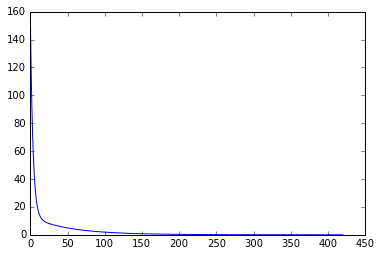

In [22]:
print ' our algo found :'
print th
print 'and it should have found :'
print theta
print 'it found it in %d steps' % t

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
plt.plot(l)
plt.show()

Now let's try with a small learning rate

In [25]:
##################### Now, run the regression
expected_cost = 1e-2
learning_rate = 1e-3

cost = 10000
## For graphing later
l2=[]
t=0
## inital guess : random
th = np.ones(n_dim)
while cost > expected_cost and not np.isinf(cost) : 
   t+=1
   ## Make a proposition
   y_pred = np.dot(X,th)
   ## loss is how far we missed
   loss  = y_pred - Y 
   ## Cost, here, is mean squared error
   ## important note : cost is a human choosen formula
   ## it s jsut a way of evaluating the quality
   ## of our model
   ## Choosing the cost is the work of data scientist
   cost = np.sum(loss ** 2) / len(Y)
   l2.append(cost)
   ## Correct the error with gradient descent
   th = th - learning_rate * np.dot(X.T,loss) / len(Y)


 our algo found :
[-8.83047716 -0.94114791  4.72091254 -9.01859915 -3.84839829]
and it should have found :
[-9 -1  5 -9 -4]
it found it in 42089 steps


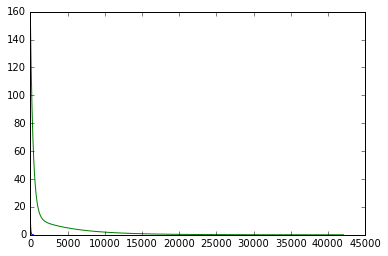

In [26]:
print ' our algo found :'
print th
print 'and it should have found :'
print theta
print 'it found it in %d steps' % t

plt.plot(l)
plt.plot(l2)
plt.show()

So.
As you (should) see on the graph below, the algo found a fine solution too but spend way more time to do it.
( about 100x more steps)
Maybe we should use a big learning rate ?


In [30]:
##################### Now, run the regression
expected_cost = 1e-2
learning_rate = 10

cost = 10000
## For graphing later
l3=[]
t=0
## inital guess : random
th = np.ones(n_dim)
while cost > expected_cost and not np.isinf(cost) : 
   t+=1
   ## Make a proposition
   y_pred = np.dot(X,th)
   ## loss is how far we missed
   loss  = y_pred - Y 
   ## Cost, here, is mean squared error
   ## important note : cost is a human choosen formula
   ## it s jsut a way of evaluating the quality
   ## of our model
   ## Choosing the cost is the work of data scientist
   cost = np.sum(loss ** 2) / len(Y)
   l3.append(cost)
   ## Correct the error with gradient descent
   th = th - learning_rate * np.dot(X.T,loss) / len(Y)
   

/home/arnold/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: overflow encountered in square


Here, with a too high learning rate, the algo does not succeed to converge. 
It falls on a cliff and diverges while looking for a solution




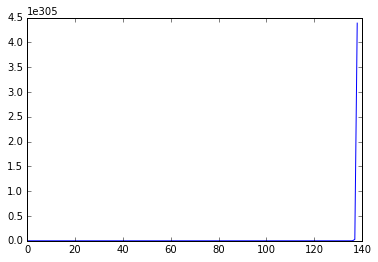

In [31]:
plt.plot(l3)

note that it is note a matter of "greater than 1 " or "lesser than 1". You can try with learning rate around 1.2.

In [42]:
expected_cost = 1e-2
learning_rate = 1.2

cost = 10000
## For graphing later
l3=[]
t=0
## inital guess : random
th = np.ones(n_dim)
while cost > expected_cost and not np.isinf(cost) : 
   t+=1
   ## Make a proposition
   y_pred = np.dot(X,th)
   ## loss is how far we missed
   loss  = y_pred - Y 
   ## Cost, here, is mean squared error
   ## important note : cost is a human choosen formula
   ## it s jsut a way of evaluating the quality
   ## of our model
   ## Choosing the cost is the work of data scientist
   cost = np.sum(loss ** 2) / len(Y)
   l3.append(cost)
   ## Correct the error with gradient descent
   th = th - learning_rate * np.dot(X.T,loss) / len(Y)

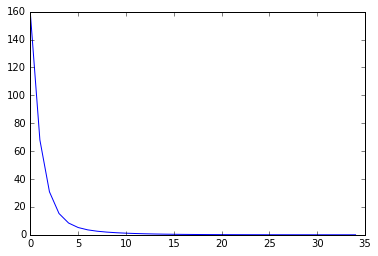

In [34]:
plt.plot(l3)

Sometimes it diverge, sometime not. Setting the learnign rate is the work of Data Scientist